In [1]:
import intake
import ciofs_hindcast_report as chr
import pandas as pd

import calendar
import seaborn as sns
sns.set_theme()

slug = "moorings_noaa" # HIDE THIS CELL
cat = intake.open_catalog(chr.CAT_NAME(slug))

# METADATA FROM CATALOG

## Map

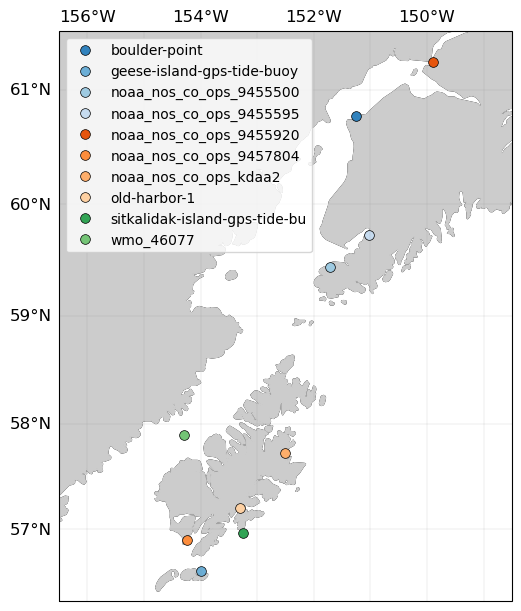

In [3]:
getattr(chr.src.plot_dataset_on_map, slug)(slug)

## boulder-point

In [ ]:
# plot direct model-data comparison

In [ ]:
# plot subtidal model-data comparison

## geese-island-gps-tide-buoy

## noaa_nos_co_ops_9455500

In [2]:
slug = "moorings_noaa_test" # HIDE THIS CELL
cat = intake.open_catalog(chr.CAT_NAME(slug))
source = "noaa_nos_co_ops_9455500"
df = cat[source].read()
df


NotImplementedError: 

In [3]:
cat[source]

noaa_nos_co_ops_9455500:
  args:
    targets:
    - noaa_nos_co_ops_9455500_base
    transform: ciofs_hindcast_report.src.process.calculate_anomaly
    transform_kwargs:
      varnames:
      - sea_water_temperature
  description: ERDDAP dataset_id noaa_nos_co_ops_9455500 from https://erddap.sensors.ioos.us/erddap
  driver: ciofs_hindcast_report.src.process.DataFrameTransform
  metadata:
    catalog_dir: /Users/kthyng/projects/ciofs-hindcast-report/ciofs_hindcast_report/outputs/catalogs/
    datasetID: noaa_nos_co_ops_9455500
    featuretype: timeSeries
    griddap: ''
    info_url: https://erddap.sensors.ioos.us/erddap/info/noaa_nos_co_ops_9455500/index.csv
    institution: NOAA Center for Operational Oceanographic Products and Services (CO-OPS)
    maptype: point
    maxLatitude: 59.440528
    maxLongitude: -151.719944
    maxTime: '2023-05-21T22:00:00Z'
    minLatitude: 59.440528
    minLongitude: -151.719944
    minTime: '1975-07-12T10:00:00Z'
    plots:
      data:
        height:

In [2]:
slug = "moorings_noaa" # HIDE THIS CELL
cat = intake.open_catalog(chr.CAT_NAME(slug))
source = "noaa_nos_co_ops_9455500"
df = cat[source].read()


Processing code for overall dataset, to add monthly means and anomalies

In [161]:
def calculate_means(dd, monthly_mean, varname):
    
    varname_mean = f"{varname}_mean"
    varname_anomaly = f"{varname}_anomaly"
    
    # function
    dd = dd.set_index(dd.cf["T"].dt.month)

    dd[varname_mean] = monthly_mean
    dd = dd.set_index(dd.cf["T"].name)

    # this shifts the mean for the first and last month so they are a bit off since they aren't interpolated
    # using the month before and month after, but the middle months are good.
    # generally this sets the mean to the 15th of the month rather than the beginning or end
    inan = (dd.index.day != 15) * (dd.index > dd.index[0]) * (dd.index < dd.index[-1])
    dd.loc[inan,varname_mean] = pd.NA
    inan = dd.duplicated(subset=varname_mean)
    dd.loc[inan,varname_mean] = pd.NA

    dd[varname_mean] = dd[varname_mean].interpolate()

    dd[varname_anomaly] = dd[varname] - dd[varname_mean]
    
    return dd
    

In [162]:
from operator import methodcaller
methodcaller("chr.utils.calculate_distance", lons=1, lats=2)

operator.methodcaller('chr.utils.calculate_distance', lons=1, lats=2)

In [167]:
a = {"package": chr.src.utils,"method": "calculate_distance"}
getattr(a["package"], a["method"])

<function ciofs_hindcast_report.src.utils.calculate_distance(lons, lats)>

In [153]:
varname = "sea_water_temperature"
# varname_mean = f"{varname}_mean"
# varname_anomaly = f"{varname}_anomaly"

# calculate monthly mean
monthly_mean = df[varname].groupby(df.cf["T"].dt.month).mean()




df_new = calculate_means(df, monthly_mean, varname)

# dd = df.copy()

# # function
# dd = dd.set_index(dd.cf["T"].dt.month)

# dd[varname_mean] = monthly_mean
# dd = dd.set_index(dd.cf["T"].name)

# # this shifts the mean for the first and last month so they are a bit off since they aren't interpolated
# # using the month before and month after, but the middle months are good.
# # generally this sets the mean to the 15th of the month rather than the beginning or end
# inan = (dd.index.day != 15) * (dd.index > dd.index[0]) * (dd.index < dd.index[-1])
# dd.loc[inan,varname_mean] = pd.NA
# inan = dd.duplicated(subset=varname_mean)
# dd.loc[inan,varname_mean] = pd.NA

# dd[varname_mean] = dd[varname_mean].interpolate()

# dd[varname_anomaly] = dd[varname] - dd[varname_mean]


In [3]:
varname = "sea_water_temperature"
# varname_mean = f"{varname}_mean"
# varname_anomaly = f"{varname}_anomaly"

# calculate monthly mean
monthly_mean = df[varname].groupby(df.cf["T"].dt.month).mean()
df_new2 = eval("chr.src.utils.calculate_anomaly(df, monthly_mean, varname)")

In [4]:
df_new2

,longitude,latitude,z,sea_surface_height_above_sea_level_geoid_mllw,sea_water_temperature,sea_water_temperature_mean,sea_water_temperature_anomaly
time,,,,,,,
1999-01-01 00:00:00+00:00,-151.719944,59.440528,0.0,4.426,4.0,4.338106,-0.338106
1999-01-01 01:00:00+00:00,-151.719944,59.440528,0.0,2.807,3.9,4.337398,-0.437398
1999-01-01 02:00:00+00:00,-151.719944,59.440528,0.0,1.074,3.9,4.336691,-0.436691
1999-01-01 03:00:00+00:00,-151.719944,59.440528,0.0,-0.335,3.9,4.335983,-0.435983
1999-01-01 04:00:00+00:00,-151.719944,59.440528,0.0,-0.969,3.8,4.335276,-0.535276
...,...,...,...,...,...,...,...
2023-05-14 03:48:00+00:00,-151.719944,59.440528,0.0,2.601,5.6,5.140411,0.459589
2023-05-14 03:54:00+00:00,-151.719944,59.440528,0.0,2.695,5.6,5.140411,0.459589
2023-05-14 04:00:00+00:00,-151.719944,59.440528,0.0,2.794,5.6,5.140411,0.459589


Plotting code

Text(0.5, 1.0, 'Monthly means and statistical variation over time')

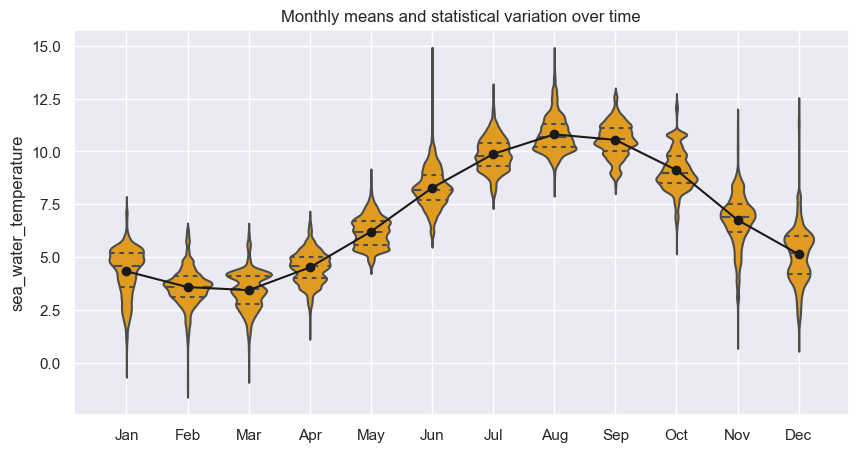

In [155]:
# unclear why I have to shift this
monthly_mean_shifted = monthly_mean.copy()
monthly_mean_shifted.index = monthly_mean_shifted.index - 1

ax = sns.violinplot(data=df, x=df.index, y="sea_water_temperature", inner="quartile", color="orange")
monthly_mean_shifted.plot(ax=ax, marker="o", color="k", figsize=(10,5))
xticks = ax.get_xticklabels()
ax.set_xticks(ax.get_xticks(), labels=[calendar.month_abbr[int(i.get_text())] for i in xticks])
ax.set_xlabel("")
ax.set_title("Monthly means and statistical variation over time")


Text(0.5, 1.0, 'Monthly means and statistical variation over time')

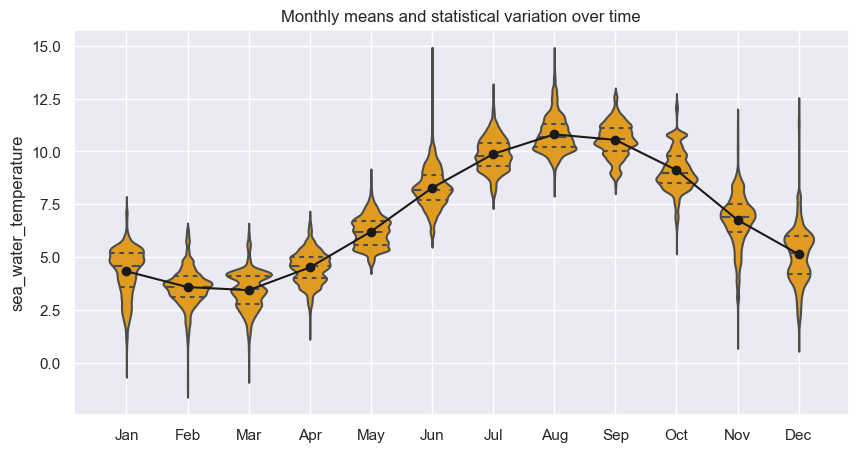

6 months segments

In [156]:
slug = "moorings_noaa_test"
cat = intake.open_catalog(chr.CAT_NAME(slug))

source = "noaa_nos_co_ops_9455500_subset_min_1999_07_01_max_2000_01_01"
ddf = cat[source].read()
ddf

,time,longitude,latitude,z,sea_surface_height_above_sea_level_geoid_mllw,sea_water_temperature
0,1999-07-01 00:00:00+00:00,-151.719944,59.440528,0.0,5.101,8.8
1,1999-07-01 01:00:00+00:00,-151.719944,59.440528,0.0,5.291,8.8
2,1999-07-01 02:00:00+00:00,-151.719944,59.440528,0.0,4.897,8.8
3,1999-07-01 03:00:00+00:00,-151.719944,59.440528,0.0,3.979,9.0
4,1999-07-01 04:00:00+00:00,-151.719944,59.440528,0.0,2.820,9.1
...,...,...,...,...,...,...
4383,1999-12-31 20:00:00+00:00,-151.719944,59.440528,0.0,4.497,4.1
4384,1999-12-31 21:00:00+00:00,-151.719944,59.440528,0.0,3.868,3.9
4385,1999-12-31 22:00:00+00:00,-151.719944,59.440528,0.0,3.063,4.0
4386,1999-12-31 23:00:00+00:00,-151.719944,59.440528,0.0,2.164,4.0


Processing code for 6 month datasets, to add monthly means and anomalies

In [157]:
varname = "sea_water_temperature"
# varname_mean = f"{varname}_mean"
# varname_anomaly = f"{varname}_anomaly"

# get monthly mean from source with full dataset


ddf_new = calculate_means(ddf, monthly_mean, varname)

# dd = ddf.copy()

# # function
# dd = dd.set_index(dd.cf["T"].dt.month)

# dd[varname_mean] = monthly_mean
# dd = dd.set_index(dd.cf["T"].name)

# # this shifts the mean for the first and last month so they are a bit off since they aren't interpolated
# # using the month before and month after, but the middle months are good.
# # generally this sets the mean to the 15th of the month rather than the beginning or end
# inan = (dd.index.day != 15) * (dd.index > dd.index[0]) * (dd.index < dd.index[-1])
# dd.loc[inan,varname_mean] = pd.NA
# inan = dd.duplicated(subset=varname_mean)
# dd.loc[inan,varname_mean] = pd.NA

# dd[varname_mean] = dd[varname_mean].interpolate()

# dd[varname_anomaly] = dd[varname] - dd[varname_mean]


<Axes: xlabel='time'>

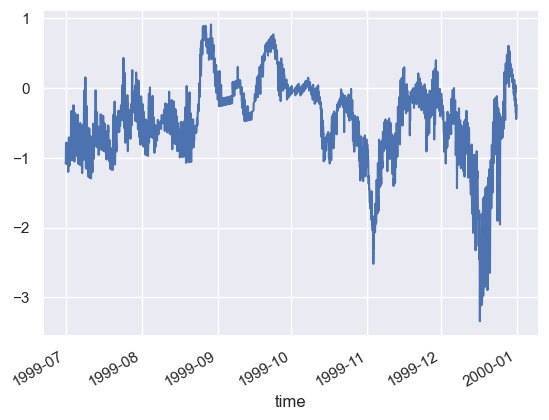

In [159]:
ddf_new["sea_water_temperature_anomaly"].plot()

In [147]:
varname = "sea_water_temperature"
varname_mean = f"{varname}_mean"
varname_anomaly = f"{varname}_anomaly"

ddf = ddf.set_index(ddf.cf["T"].dt.month)

ddf[varname_mean] = monthly_mean
ddf = ddf.set_index(ddf.cf["T"].name)

# this shifts the mean for the first and last month so they are a bit off since they aren't interpolated
# using the month before and month after, but the middle months are good.
# generally this sets the mean to the 15th of the month rather than the beginning or end
inan = (ddf.index.day != 15) * (ddf.index > ddf.index[0]) * (ddf.index < ddf.index[-1])
ddf.loc[inan,varname_mean] = pd.NA
inan = ddf.duplicated(subset=varname_mean)
ddf.loc[inan,varname_mean] = pd.NA

ddf[varname_mean] = ddf[varname_mean].interpolate()

ddf[varname_anomaly] = ddf[varname] - ddf[varname_mean]


<Axes: xlabel='time'>

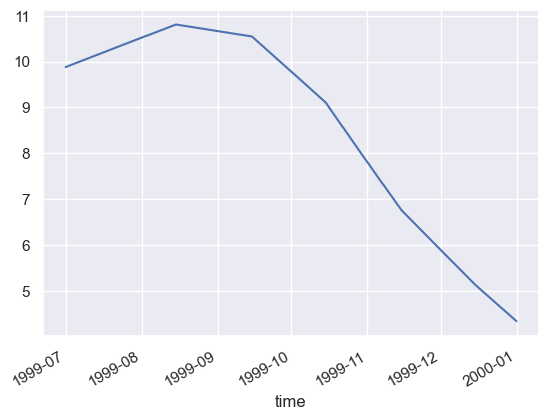

In [145]:
ddf["annual_mean"].plot()

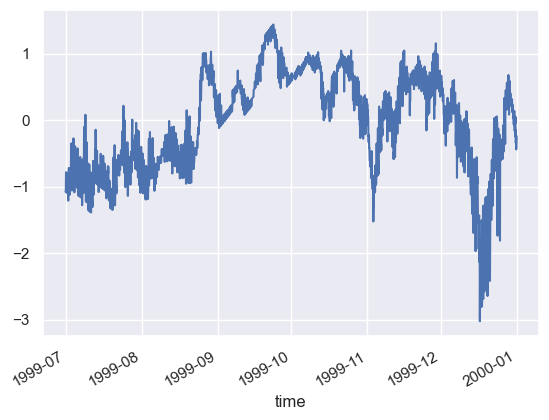

In [113]:
ax = ddf["sea_water_temperature_anomaly"].plot()
# ddf["sea_water_temperature"].plot(ax=ax)
# (ddf["sea_water_temperature"] - ddf["annual_mean"]).plot(ax=ax)